# video-games-sales-data

Use the "Run" button to execute the code.

In [6]:
!pip install jovian opendatasets --upgrade --quiet

In [7]:
import jovian

# Downloding the dataset from kaggle

In [8]:
dataset_url = 'https://www.kaggle.com/sidtwr/videogames-sales-dataset'

In [10]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abhigangalwar
Your Kaggle Key: ········


100%|██████████| 507k/507k [00:00<00:00, 62.7MB/s]

In [12]:
data_dir = './videogames-sales-dataset'

In [13]:
import os
os.listdir(data_dir)

['PS4_GamesSales.csv',
 'XboxOne_GameSales.csv',
 'Video_Games_Sales_as_at_22_Dec_2016.csv']

Let us save and upload our work to Jovian before continuing.

In [14]:
project_name = "video-games-sales-data"

In [15]:
!pip install jovian --upgrade -q

In [16]:
import jovian

In [17]:
jovian.commit(project='video-games-sales-data')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "abhi-gangalwar/video-games-sales-data" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/abhi-gangalwar/video-games-sales-data


'https://jovian.ai/abhi-gangalwar/video-games-sales-data'

## Data preparation and cleaning
now we will start to upload the dataframe using pandas and will look after the shape of dataframe, range of values and will try to clean it if its neccesary etc.

In [19]:
#importing relevent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# importing the dataframe

In [30]:
df= pd.read_csv('./videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [32]:
#visualizing the dataframe
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#finding no. of rows and columns inside the dataframe
df.shape

(16719, 16)

there are total 16719 rows and 16 columns inside the selected dataframe

#### Now we will try to describe the dataframe to better understand what we are dealing with, and with the help of max, min and min we can get range for columns

In [34]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [35]:
# from this we got to know about the distribution of elements inside our dataframe

In [37]:
#lets check if the sales data in nominal figures is intact or not
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

### from here we can see that platform column and also all the columns where sales figures are written does not contain any vacant cells

####lets find the vacant cells location from the Name column

In [47]:
np.where(pd.isnull(df['Name']))

(array([  659, 14246]),)

lets see if its true we will first slice our dataframe around this cell no's

In [48]:
df[655:660]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
655,Pro Wrestling,NES,1987.0,Fighting,Nintendo,0.77,0.18,1.42,0.03,2.40,NaN,NaN,NaN,NaN,NaN,NaN
656,Theme Hospital,PC,1997.0,Strategy,Electronic Arts,2.30,0.10,0.00,0.00,2.40,NaN,NaN,9.0,90.0,Bullfrog Productions,K-A
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39,73.0,4.0,NaN,NaN,Konami Computer Entertainment Hawaii,E
658,Monopoly,PC,1994.0,Misc,Hasbro Interactive,1.49,0.81,0.00,0.10,2.39,NaN,NaN,NaN,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN


Here, we can see that Name in column 659 is empty

In [49]:
#lets assign the name to this cell and 14246'th cell
#This is shown for dataframe cleaning purpose only cause names cant be predicted.
# lets give it a name as- Super Mario for cell 659 and 14246'th cell as Contra
df['Name'][659]= 'Super Mario'
df['Name'][14246]= 'Contra'


/tmp/ipykernel_36/1219159118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][659]= 'Super Mario'
/tmp/ipykernel_36/1219159118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][14246]= 'Contra'


In [50]:
##now lets see if this got reflected in the dataframe or not

In [51]:
df["Name"][14246]

'Contra'

## Now we will check whether all the empty cells inside the column named 'Name' are filled or not

In [53]:
df['Name'].isnull().sum()

0

Empty cells= 0 means we were able to the "Name" column effectively

In [56]:
jovian.commit(project='video-games-sales-data')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "abhi-gangalwar/video-games-sales-data" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/abhi-gangalwar/video-games-sales-data


'https://jovian.ai/abhi-gangalwar/video-games-sales-data'

## Now we will see if the sales values of NA, EU, JP and other sales equals to the global sell or not

In [61]:
df['Cross_checking']= df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [62]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,29.80
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN,28.31


## we will drop non important columns cause its making hurdle in cross checking cause dataframe isnt clearly visible

In [71]:
df.drop(columns= ['Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating'], axis=1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38
...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,0.01


From above we can see that all the sales figures combine forms Global_sales cause, Global_Sales= Cross_checking

#  Q.1 how many years of data do we have?

In [74]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [75]:
# we can see above that we are having the data from 2006 till 2017.

# Q.2 What is the total Global sale done by video game companies during 2006-2017?

In [77]:
df['Global_Sales'].sum()

8920.300000000001

## Q.3 what is the sales according to the year of release of  video game titles?

In [78]:
df.groupby(['Year_of_Release'])['Global_Sales'].sum()

Year_of_Release
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     48.40
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    419.05
2005.0    458.31
2006.0    518.22
2007.0    605.37
2008.0    671.79
2009.0    658.88
2010.0    590.59
2011.0    507.79
2012.0    355.84
2013.0    361.24
2014.0    331.51
2015.0    268.05
2016.0    130.10
2017.0      0.06
2020.0      0.29
Name: Global_Sales, dtype: float64

## list mentioned above shows the Global sales of titles according to their release date

# Q.4 Is there any relationship between sales in North America and Global_Sales

In [79]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24


In [80]:
#lets declare two variables to see the relationship
X= df['NA_Sales']
Y= df['Global_Sales']

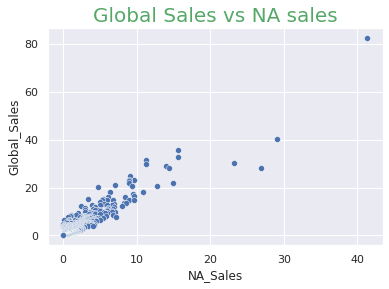

In [87]:
sns.scatterplot(x=X,y=Y)
plt.title('Global Sales vs NA sales', fontsize=20, color= 'g')
plt.show()

<AxesSubplot:xlabel='NA_Sales', ylabel='Global_Sales'>

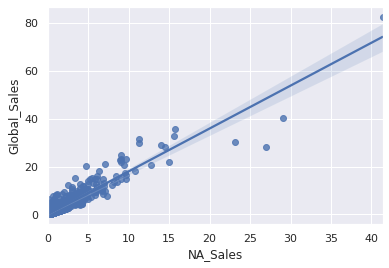

In [88]:
sns.regplot(x=X,y=Y)

## there seems to be a linear relationship between the sales in NA and Global sales, as NA_Sales goes up Global_Sales also goes up, Means we can say that Global_sales is dependent upon NA's economy

## Q.5 which platform is helping the most for global video games sales?

In [115]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38


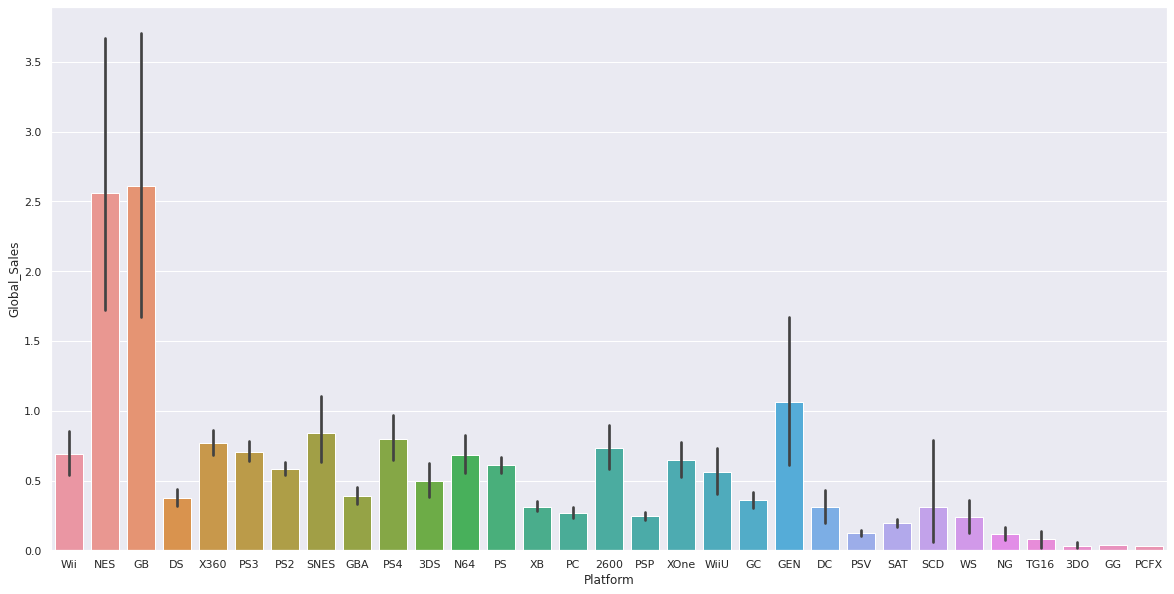

In [152]:
sns.barplot(x=df['Platform'],y=df['Global_Sales'])
sns.set(rc={'figure.figsize':(5,50)})

here, we can see that the platforms named NES and GB is contributing most to the sales of video games.

In [153]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38


## Q.6 what genre of games got produced more during 2007 to 2016?

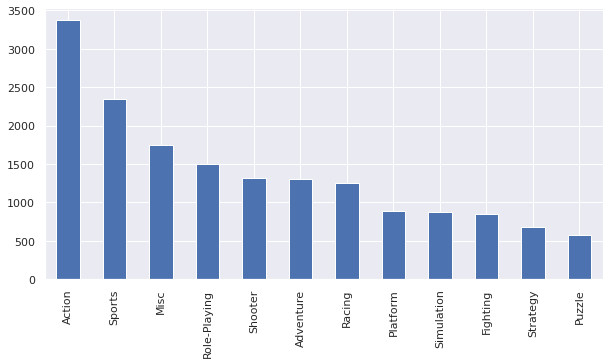

In [161]:
df['Genre'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=[5,10]

#### from the bar chart created above we can see that during 2006 to 2007, Action was the major category of games produced.

In [162]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38


## Q.7  how's the trend in global video game sales over the years?

<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

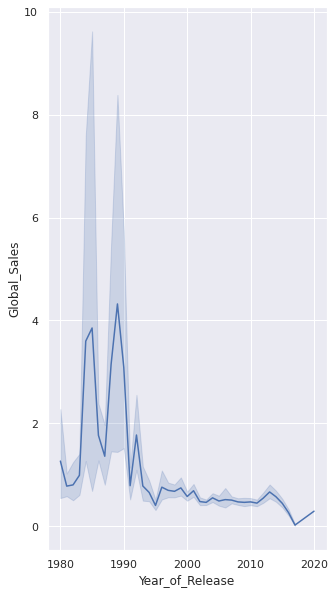

In [168]:
sns.lineplot(x=df['Year_of_Release'], y=df['Global_Sales'])

## During 1980 till 1990 global sales of video games was good and since then it is in declining mode 

In [169]:
jovian.commit(project='video-games-sales-data')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "abhi-gangalwar/video-games-sales-data" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/abhi-gangalwar/video-games-sales-data


'https://jovian.ai/abhi-gangalwar/video-games-sales-data'

## Questions and Answers

Question are asked above while solving an Assignment and also answers are given below them.

References=

https://www.kite.com/python/answers/how-to-print-an-entire-pandas-dataframe-in-python#:~:text=Use%20pandas.,to%20be%20displayed%20when%20printed.
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27